In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import sklearn
import warnings
warnings.filterwarnings('ignore')
import joblib

In [2]:
data = pd.read_csv('/content/Credit_card_dataset.csv')
data

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000
...,...,...,...,...,...,...
8945,C19186,1.000000,291.12,325.594462,1000.0,0.000000
8946,C19187,1.000000,300.00,275.861322,1000.0,0.000000
8947,C19188,0.833333,144.40,81.270775,1000.0,0.000000
8948,C19189,0.833333,0.00,52.549959,500.0,36.558778


In [3]:
df = data.copy()
df.head()

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000


In [4]:
df.isnull().sum()

CUST_ID              0
BALANCE_FREQUENCY    0
PURCHASES            0
PAYMENTS             0
CREDIT_LIMIT         1
CASH_ADVANCE         0
dtype: int64

In [5]:
df.drop('CUST_ID', axis = 1, inplace = True)
df.head()

,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,0.818182,95.40,201.802084,1000.0,0.000000
1,0.909091,0.00,4103.032597,7000.0,6442.945483
2,1.000000,773.17,622.066742,7500.0,0.000000
3,0.636364,1499.00,0.000000,7500.0,205.788017
4,1.000000,16.00,678.334763,1200.0,0.000000


In [6]:
for CREDIT_LIMIT in df:
    if (df['CREDIT_LIMIT'].isnull().sum() / len(df)).round(2) * 100 < 30:
        if df['CREDIT_LIMIT'].dtypes != 'O':
            df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace = True)
        else:
            df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mode()[0], inplace = True)
    else:
        df.drop('CREDIT_LIMIT', axis = 1, inplace = True)

df.isnull().sum()

BALANCE_FREQUENCY    0
PURCHASES            0
PAYMENTS             0
CREDIT_LIMIT         0
CASH_ADVANCE         0
dtype: int64

In [7]:
df.describe()

,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.877271,1003.204834,1733.143852,4494.282473,978.871112
std,0.236904,2136.634782,2895.063757,3638.646702,2097.163877
min,0.000000,0.000000,0.000000,50.000000,0.000000
25%,0.888889,39.635000,383.276166,1600.000000,0.000000
50%,1.000000,361.280000,856.901546,3000.000000,0.000000
75%,1.000000,1110.130000,1901.134317,6500.000000,1113.821139
max,1.000000,49039.570000,50721.483360,30000.000000,47137.211760


In [8]:
from sklearn.preprocessing import StandardScaler
toBeScaled = ['PURCHASES', 'PAYMENTS', 'CREDIT_LIMIT', 'CASH_ADVANCE']
scaling = {}
# .......... Instantiate your algorithm(Instantiation)

for i in toBeScaled:
    scaler = StandardScaler()
    df[i] = scaler.fit_transform(df[[i]])
    scaling[i + '_scaler'] = scaler
    joblib.dump(scaler, open(f'{i}_scaling.pkl', 'wb'))

scaling

{'PURCHASES_scaler': StandardScaler(),
 'PAYMENTS_scaler': StandardScaler(),
 'CREDIT_LIMIT_scaler': StandardScaler(),
 'CASH_ADVANCE_scaler': StandardScaler()}

In [9]:
df.head()

,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,0.818182,-0.424900,-0.528979,-0.960378,-0.466786
1,0.909091,-0.469552,0.818642,0.688678,2.605605
2,1.000000,-0.107668,-0.383805,0.826100,-0.466786
3,0.636364,0.232058,-0.598688,0.826100,-0.368653
4,1.000000,-0.462063,-0.364368,-0.905410,-0.466786


<Axes: xlabel='PURCHASES', ylabel='CREDIT_LIMIT'>

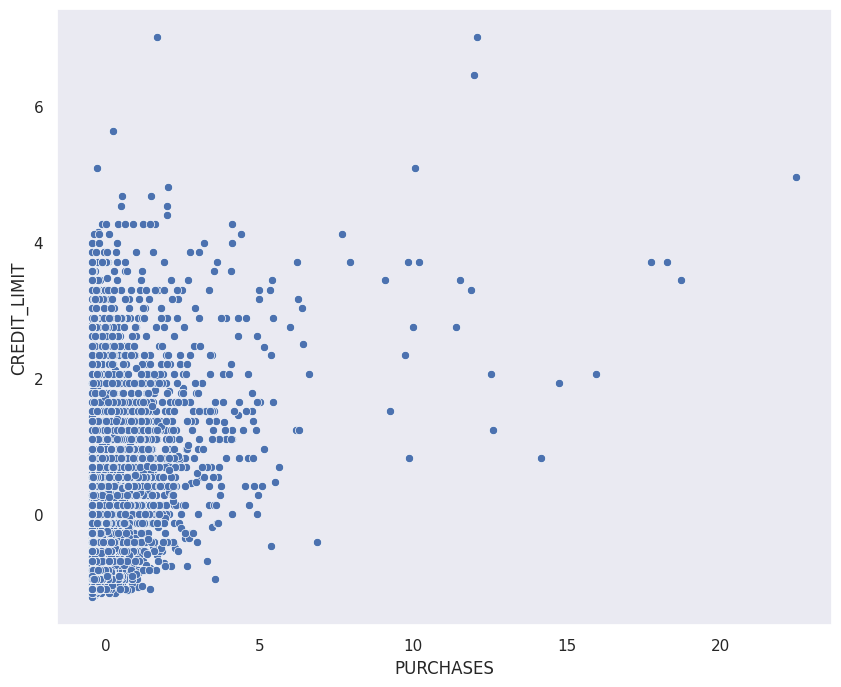

In [10]:
sel = df[['PURCHASES', 'CREDIT_LIMIT']]

plt.figure(figsize=(10,8))
sns.set(style = 'darkgrid')
plt.grid(False)
sns.scatterplot(x = sel['PURCHASES'], y = sel['CREDIT_LIMIT'])

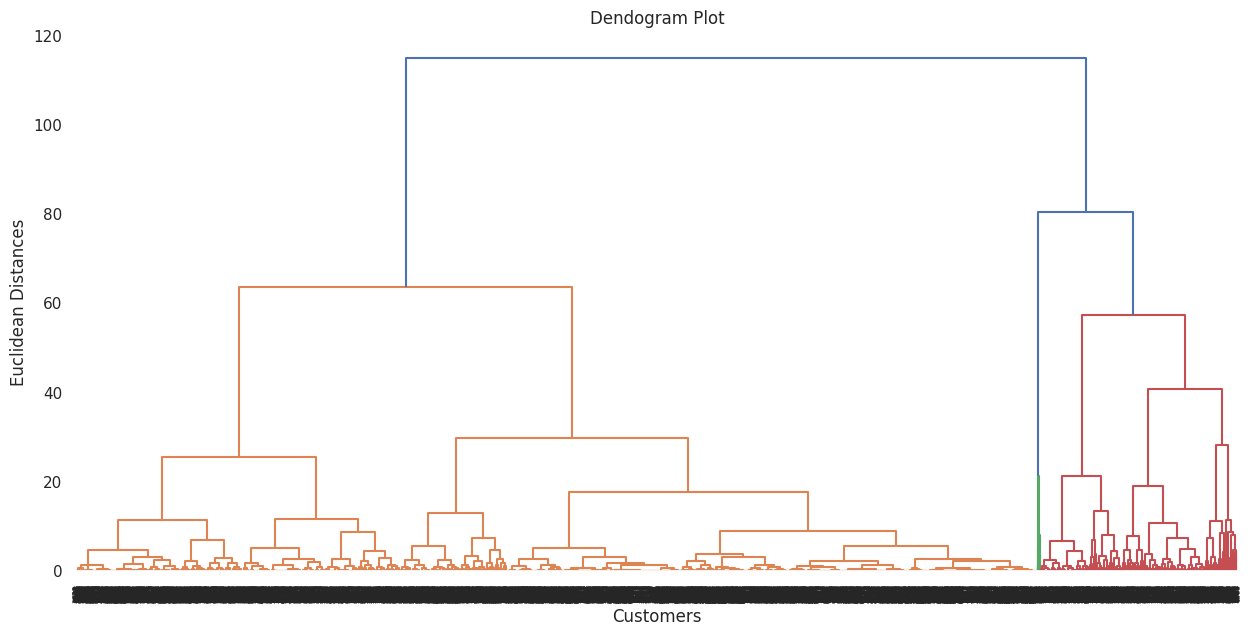

In [11]:
# We endeavour to identify the numbers of Hierarchy needed for the clustering

import scipy.cluster.hierarchy as shc
plt.figure(figsize = (15, 7))

# select the columns needed
xx = sel[['PURCHASES', 'CREDIT_LIMIT']]

dendro = shc.dendrogram(shc.linkage(xx, method="ward"))
plt.title("Dendogram Plot")
plt.ylabel("Euclidean Distances")
plt.xlabel("Customers")
plt.show()

In [12]:
from sklearn.cluster import AgglomerativeClustering
h_cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster_predict2 = h_cluster.fit_predict(xx)
xx['Clusters'] = cluster_predict2
xx

,PURCHASES,CREDIT_LIMIT,Clusters
0,-0.424900,-0.960378,1
1,-0.469552,0.688678,3
2,-0.107668,0.826100,3
3,0.232058,0.826100,3
4,-0.462063,-0.905410,1
...,...,...,...
8945,-0.333293,-0.960378,1
8946,-0.329136,-0.960378,1
8947,-0.401965,-0.960378,1
8948,-0.469552,-1.097800,1


In [13]:
xx['Clusters'].values

array([1, 3, 3, ..., 1, 1, 1])

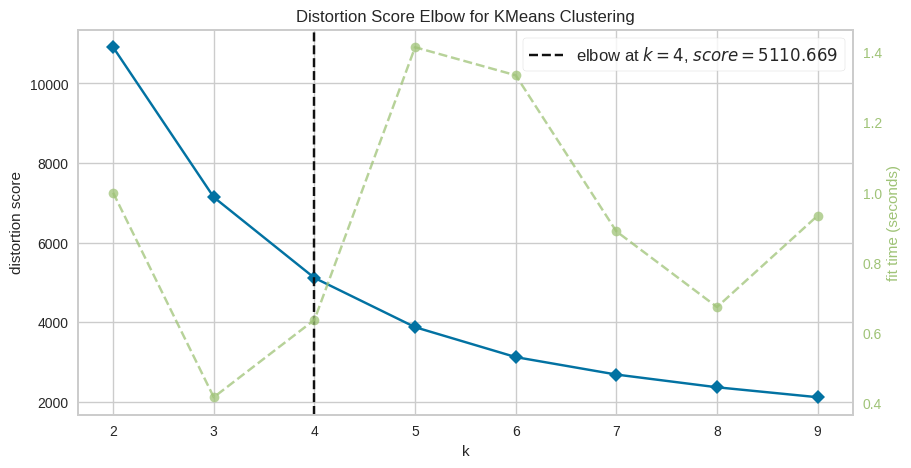

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
!pip install yellowbrick  --q
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))

plt.figure(figsize = (10, 5))
visualizer.fit(sel)
visualizer.show()

In [15]:
from sklearn.cluster import KMeans # ------------------------------------------- Instantiate the KMeans algorithm

kMeans_model = KMeans(n_clusters = 4,    # ............................................... number of clusters we want
            init = 'k-means++',
            n_init = 10,
            max_iter = 100,
            random_state = 90)
kMeans_model

KMeans(max_iter=100, n_clusters=4, n_init=10, random_state=90)

In [16]:
clusters_predict = kMeans_model.fit_predict(sel)
sel['Clusters'] = clusters_predict
sel.head()

,PURCHASES,CREDIT_LIMIT,Clusters
0,-0.424900,-0.960378,0
1,-0.469552,0.688678,3
2,-0.107668,0.826100,3
3,0.232058,0.826100,3
4,-0.462063,-0.905410,0


Text(0.5, 1.0, 'Purchase vs Credit Limit Visualization')

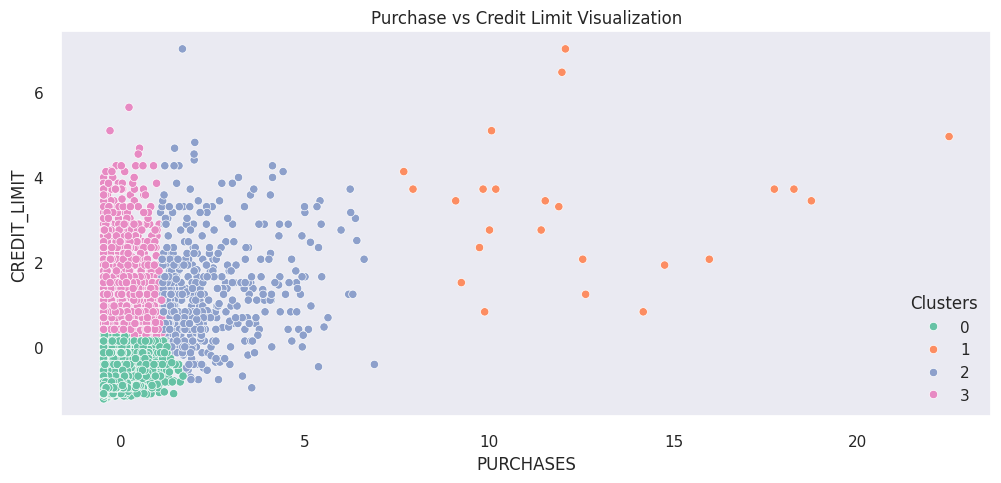

In [17]:
sns.set(style = 'darkgrid')
plt.figure(figsize=(12,5))
plt.grid(False)
sns.scatterplot(x=sel['PURCHASES'], y=sel['CREDIT_LIMIT'], hue = sel['Clusters'], palette = 'Set2')
plt.title('Purchase vs Credit Limit Visualization')

In [18]:
dfs = sel.astype({"Clusters": "object"})
dfs = dfs.sort_values("Clusters")

fig = px.scatter(
      dfs,
      x='PURCHASES',
      y='CREDIT_LIMIT',
      color='Clusters')
fig.show()

,PURCHASES,CREDIT_LIMIT,Clusters,ClusterInterprete
0,-0.424900,-0.960378,0,LwPur_LWCL
1,-0.469552,0.688678,3,LwPur_MidCL
2,-0.107668,0.826100,3,LwPur_MidCL
3,0.232058,0.826100,3,LwPur_MidCL
4,-0.462063,-0.905410,0,LwPur_LWCL


Text(0.5, 1.0, 'Cluster Class By Average Price')

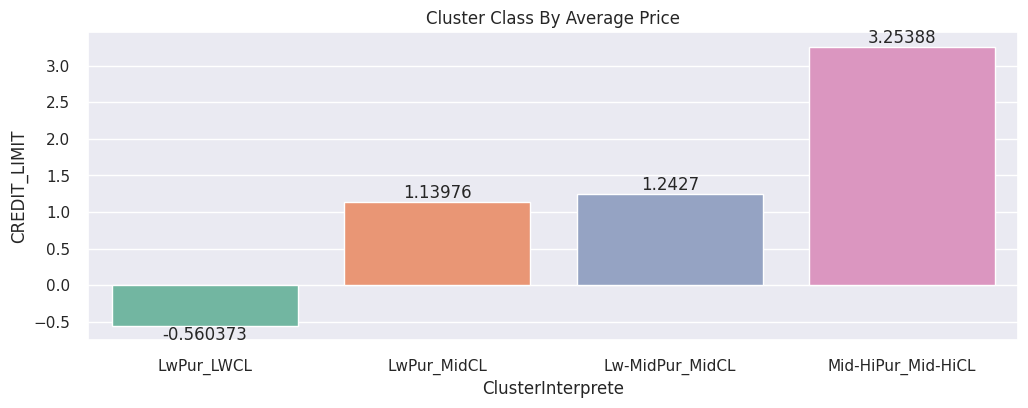

In [19]:
sel['ClusterInterprete'] = sel.Clusters.map({3: 'LwPur_MidCL',
                               1: 'Mid-HiPur_Mid-HiCL',
                               2: 'Lw-MidPur_MidCL',
                               0: 'LwPur_LWCL'})

display(sel.head())

plt.figure(figsize = (12,4))
fig = sns.barplot(x = sel.ClusterInterprete, y = sel.CREDIT_LIMIT, palette = 'Set2', ci = 0)
for i in fig.containers:
    fig.bar_label(i)
plt.title('Cluster Class By Average Price')